In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
dataset = pd.read_csv('./pima-indians-diabetes.csv')
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0, np.NaN)
    mean = int(dataset[column].mean(skipna=True))
    dataset[column] = dataset[column].replace(np.NaN, mean)
x = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')
classifier.fit(x_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=1, n_neighbors=11, p=2,
                    weights='uniform')
y_pred = classifier.predict(x_test)
y_pred
import math
math.sqrt(len(y_train))
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred))

[[94 13]
 [15 32]]
0.6956521739130436


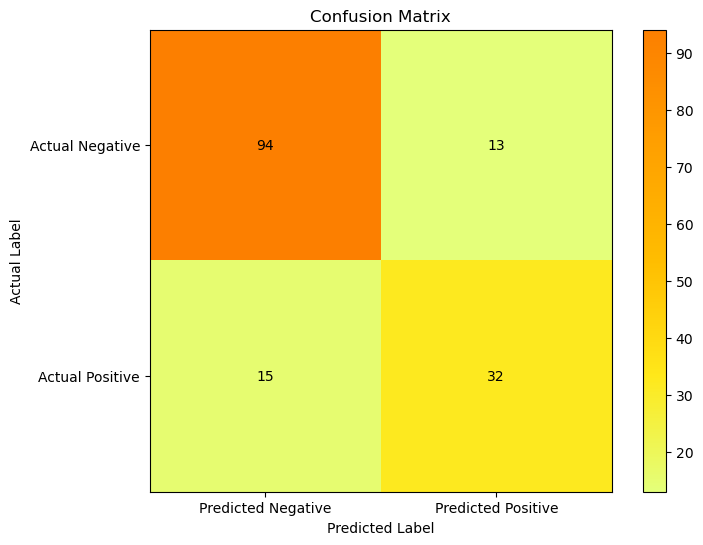

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0, 1], ['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center', color='black')

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

(0.0, 1.0)

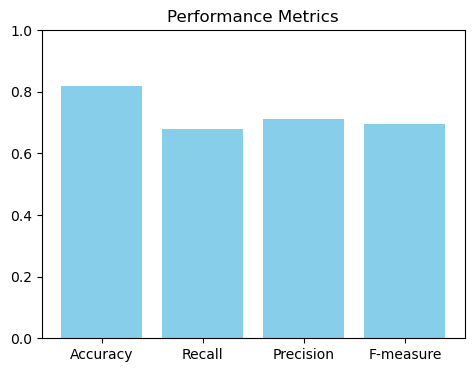

In [6]:
# Display Accuracy, Recall, Precision, and F-measure
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.bar(['Accuracy', 'Recall', 'Precision', 'F-measure'], [accuracy, recall, precision, f1], color='skyblue')
plt.title('Performance Metrics')
plt.ylim(0, 1)

In [9]:
predictions_prob = classifier.predict_proba(x_test)[:, 1]

In [10]:
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
roc_auc = roc_auc_score(y_test, predictions_prob)

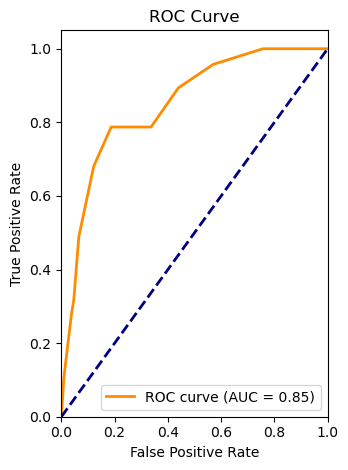

In [11]:
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()